## Capstone Project: Payment Patterns

**"Payment Patterns that fits their NEEDS"** <br>
Hypothesis 1: Recency, Frequecy and Monetary features of the previous payments affect the current approval <br>
Hypothesis 2: There are different clusters of customer segments in each RFM payment patterns <br>

Datasets to use: <br>
- previous
- application train and test
- POS Cash balance
- Installment balance
- Credit card balance

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Preparation

Check the availability of the data to test the *Hypothesis 1*

In [2]:
previous = pd.read_csv("previous_application.csv")
pd.set_option("max_columns", 150)
display(previous.head())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
current = pd.read_csv("application_train.csv")
# let's see the difference in their shape
print(current.shape, previous.shape)

(307511, 122) (1670214, 37)


In [4]:
pos = pd.read_csv("POS_CASH_balance.csv")
instal = pd.read_csv("installments_payments.csv")
cc = pd.read_csv("credit_card_balance.csv")

# let's see the difference in shape of the payments data
print(pos.shape, instal.shape, cc.shape)

(10001358, 8) (13605401, 8) (3840312, 23)


In [5]:
display(pos.head())
display(instal.head())
display(cc.head())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Let us get the unique `SK_ID_PREV` and `SK_ID_CURR` values

In [6]:
pos_id = pos['SK_ID_PREV'].unique().tolist()
instal_id = instal['SK_ID_PREV'].unique().tolist()
cc_id = cc['SK_ID_PREV'].unique().tolist()

In [7]:
unique_id = list(set(pos_id + instal_id + cc_id))
print('Previous ID loans total to {}'.format(len(unique_id)))
type(unique_id)

Previous ID loans total to 1040969


list

In [8]:
pos_id = pos['SK_ID_CURR'].unique().tolist()
instal_id = instal['SK_ID_CURR'].unique().tolist()
cc_id = cc['SK_ID_CURR'].unique().tolist()

In [9]:
curr_unique_id = list(set(pos_id + instal_id + cc_id))
print('While, Current ID loans total to {}'.format(len(curr_unique_id)))
type(curr_unique_id)

While, Current ID loans total to 340365


list

Filter out the dataset that only has those unique `SK_ID_PREV` and `SK_ID_CURR` values with the necessary columns.

In [10]:
# Filter current dataset to include id and target variable
current_df = current.loc[current['SK_ID_CURR'].isin(curr_unique_id), ['SK_ID_CURR', 'TARGET']]
curr_unique_id = current_df['SK_ID_CURR']
current_df.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [11]:
# Filter pos dataset to include ID, MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS' and 'PAYMENT_TYPE' columns
pos_df = pos.loc[pos['SK_ID_CURR'].isin(curr_unique_id), 'SK_ID_CURR':'NAME_CONTRACT_STATUS']
pos_df.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS
0,182943,-31,48.0,45.0,Active
1,367990,-33,36.0,35.0,Active
2,397406,-32,12.0,9.0,Active
3,269225,-35,48.0,42.0,Active
4,334279,-35,36.0,35.0,Active


In [12]:
pos_df = pos_df.groupby(['SK_ID_CURR']).agg({
    'MONTHS_BALANCE': 'min',
    'CNT_INSTALMENT': 'max',
    'CNT_INSTALMENT_FUTURE': ['max', 'count'],
    'NAME_CONTRACT_STATUS': 'max'
})
pos_df.columns = ["_POS_".join(x) for x in pos_df.columns.ravel()]
pos_df.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max
SK_ID_CURR,,,,,
100002,-19,24.0,24.0,19,Active
100003,-77,12.0,12.0,28,Completed
100004,-27,4.0,4.0,4,Completed
100006,-20,48.0,48.0,20,Returned to the store
100007,-77,24.0,24.0,66,Signed


In [13]:
pos_df['POS_PAYMENT_TYPE'] = 1
pos_df = pos_df.reset_index()
pos_df['SK_ID_CURR_POS'] = pos_df['SK_ID_CURR']
pos_df = pos_df.drop(columns=['SK_ID_CURR'])

### Visualization for POS Cash Balance
Frequency vs Recency

In [14]:
pos_df.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max,POS_PAYMENT_TYPE,SK_ID_CURR_POS
0,-19,24.0,24.0,19,Active,1,100002
1,-77,12.0,12.0,28,Completed,1,100003
2,-27,4.0,4.0,4,Completed,1,100004
3,-20,48.0,48.0,20,Returned to the store,1,100006
4,-77,24.0,24.0,66,Signed,1,100007


In [15]:
pos_df.CNT_INSTALMENT_POS_max.mean()

20.426173035726627

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(-105, 90, 'The mean frequency of payments ranges from 19 to 22 for 100 to 20 months after\nthe credit however for the last 20 months the mean frequency decreases by almost 33%')

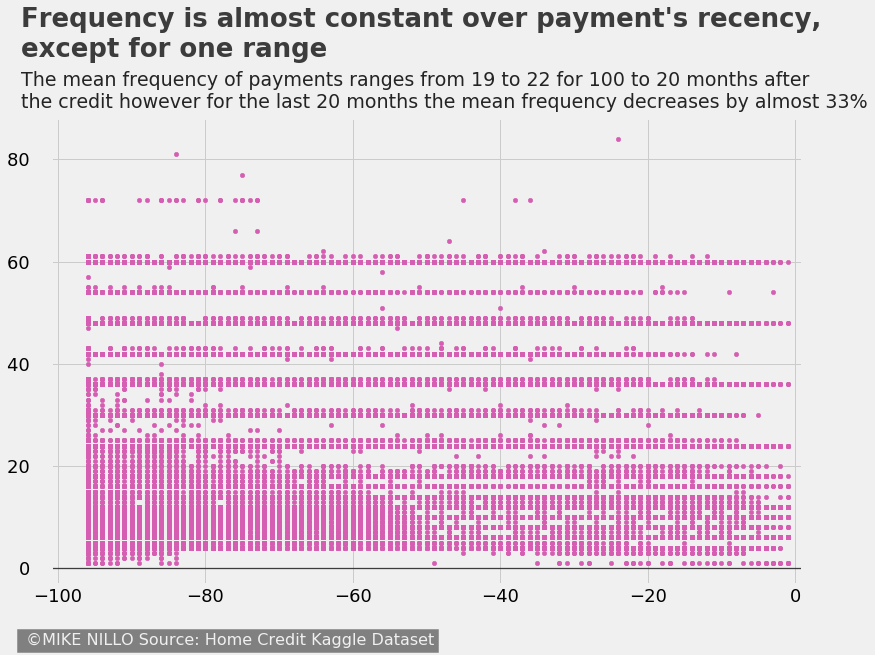

In [16]:
import matplotlib.style as style
style.use('fivethirtyeight')
freq_vs_rec = pos_df.plot(x = 'MONTHS_BALANCE_POS_min', y = 'CNT_INSTALMENT_POS_max', kind = 'scatter', figsize = (12,8), color= [213/255,94/255,178/255])
freq_vs_rec.tick_params(axis = 'both', which = 'major', labelsize = 18)
freq_vs_rec.set_yticklabels(labels = [-10, '0   ', '20   ', '40   ', '60   ', '80   '])
freq_vs_rec.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
freq_vs_rec.set_xlim(left = -101, right = 1)

freq_vs_rec.xaxis.label.set_visible(False)
freq_vs_rec.yaxis.label.set_visible(False)
freq_vs_rec.text(x = -105, y = -15,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
freq_vs_rec.text(x = -105, y = 100, s = "Frequency is almost constant over payment's recency,\nexcept for one range",
               fontsize = 26, weight = 'bold', alpha = .75)
freq_vs_rec.text(x = -105, y = 90,
               s = 'The mean frequency of payments ranges from 19 to 22 for 100 to 20 months after\nthe credit however for the last 20 months the mean frequency decreases by almost 33%',
              fontsize = 19, alpha = .85)

In [17]:
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-20, 0))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-40, -20))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-60, -40))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-80, -60))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-100, -80))), 'CNT_INSTALMENT_POS_max'].mean())

14.805981308411216
19.77082769059189
22.410657094340433
22.215265883906646
22.78155134046837


There are not so much relationship in this graph. So we can say that the even the payment dates become closer, the frequency of payments are still the same.

In [18]:
pos_df['difference'] = pos_df.CNT_INSTALMENT_FUTURE_POS_max - pos_df.CNT_INSTALMENT_POS_max
print(pos_df.loc[pos_df['CNT_INSTALMENT_POS_max'] < 36, 'difference'].mean())
print(pos_df.loc[pos_df['CNT_INSTALMENT_POS_max'] >= 36, 'difference'].mean())

-0.1218454208169138
-0.07594615649401236


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


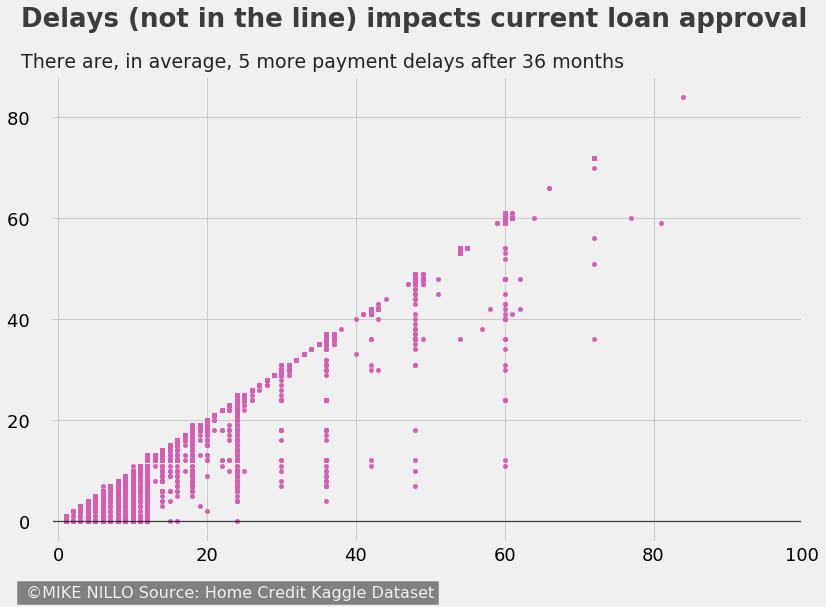

In [19]:
##### import matplotlib.style as style
style.use('fivethirtyeight')
freq_vs_rec = pos_df.plot(x = 'CNT_INSTALMENT_POS_max', y = 'CNT_INSTALMENT_FUTURE_POS_max', kind = 'scatter', figsize = (12,8), color= [213/255,94/255,178/255])
freq_vs_rec.tick_params(axis = 'both', which = 'major', labelsize = 18)
freq_vs_rec.set_yticklabels(labels = [-10, '0   ', '20   ', '40   ', '60   ', '80   '])
freq_vs_rec.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
freq_vs_rec.set_xlim(left = -1, right = 100)

freq_vs_rec.xaxis.label.set_visible(False)
freq_vs_rec.yaxis.label.set_visible(False)
freq_vs_rec.text(x = -5, y = -15,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
freq_vs_rec.text(x = -5, y = 98, s = "Delays (not in the line) impacts current loan approval",
               fontsize = 26, weight = 'bold', alpha = .75)
freq_vs_rec.text(x = -5, y = 90,
               s = 'There are, in average, 5 more payment delays after 36 months',
              fontsize = 19, alpha = .85)
plt.savefig('frequency_delay.png')

In [20]:
# Filter instal dataset to include ID, MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS' and 'PAYMENT_TYPE' columns
instal_df = instal.loc[instal['SK_ID_CURR'].isin(curr_unique_id), 'SK_ID_CURR':'AMT_PAYMENT']
instal_df.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [21]:
instal_df = instal_df.groupby('SK_ID_CURR').agg({
    'DAYS_INSTALMENT': 'max',
    'DAYS_ENTRY_PAYMENT': 'max',
    'AMT_INSTALMENT': 'max',
    'AMT_PAYMENT': ['max', 'count']
})
instal_df.columns = ["_INST_".join(x) for x in instal_df.columns.ravel()]
instal_df.head()

,DAYS_INSTALMENT_INST_max,DAYS_ENTRY_PAYMENT_INST_max,AMT_INSTALMENT_INST_max,AMT_PAYMENT_INST_max,AMT_PAYMENT_INST_count
SK_ID_CURR,,,,,
100002,-25.0,-49.0,53093.745,53093.745,19
100003,-536.0,-544.0,560835.360,560835.360,25
100004,-724.0,-727.0,10573.965,10573.965,3
100006,-11.0,-12.0,691786.890,691786.890,16
100007,-14.0,-14.0,22678.785,22678.785,66


In [22]:
instal_df['INST_PAYMENT_TYPE'] = 1
instal_df = instal_df.reset_index()
instal_df['SK_ID_CURR_INST'] = instal_df['SK_ID_CURR']
instal_df = instal_df.drop(columns=['SK_ID_CURR'])

### Visualization for Installment Cash Balance
Recency vs Monetary

In [23]:
instal_df = instal_df.dropna()

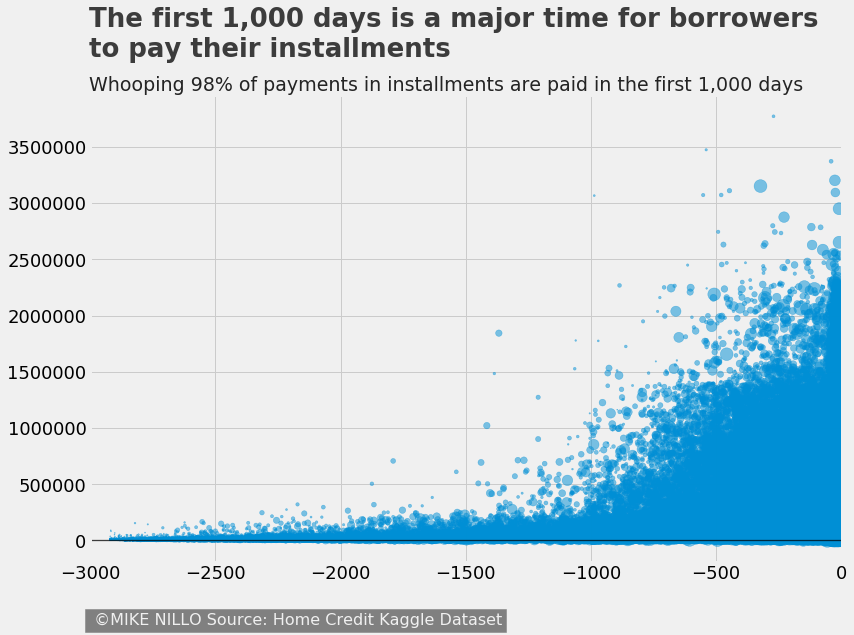

In [24]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(x = instal_df['DAYS_INSTALMENT_INST_max'], y = instal_df['AMT_INSTALMENT_INST_max'], s=instal_df['AMT_PAYMENT_INST_count'], alpha=0.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#plt.yticks(labels = [-10, '1 Million   ', '2 Million   ', '3 Million   '])
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = -3001, right = 1)

#plt.xaxis.label.set_visible(False)
#freq_vs_rec.yaxis.label.set_visible(False)
plt.text(x = -3005, y = -750000,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = -3005, y = 4300000, s = "The first 1,000 days is a major time for borrowers\nto pay their installments ",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -3005, y = 4000000,
               s = 'Whooping 98% of payments in installments are paid in the first 1,000 days',
              fontsize = 19, alpha = .85)
plt.savefig('recency_blue.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


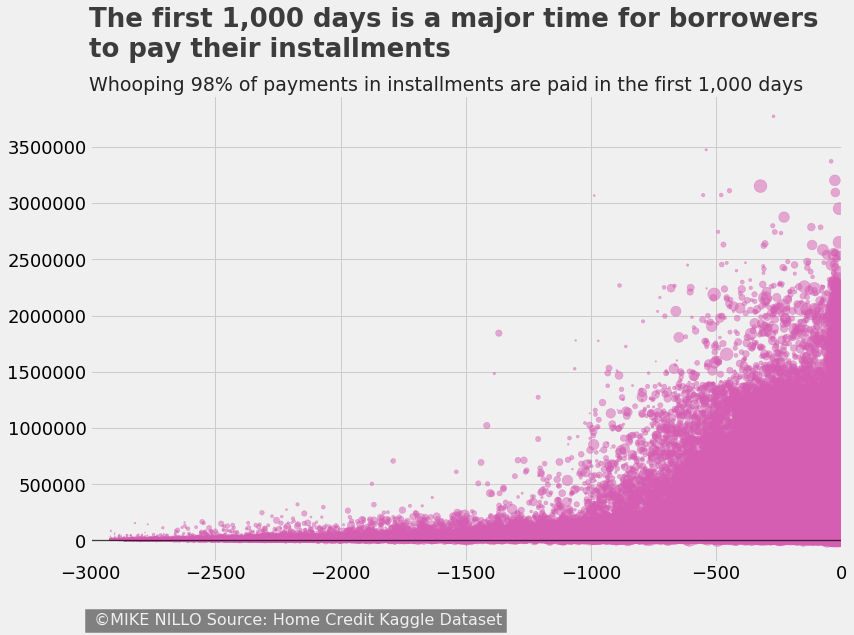

In [25]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(x = instal_df['DAYS_INSTALMENT_INST_max'], y = instal_df['AMT_INSTALMENT_INST_max'], s=instal_df['AMT_PAYMENT_INST_count'], alpha=0.5, c=[213/255,94/255,178/255])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#plt.yticks(labels = [-10, '1 Million   ', '2 Million   ', '3 Million   '])
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = -3001, right = 1)

#plt.xaxis.label.set_visible(False)
#freq_vs_rec.yaxis.label.set_visible(False)
plt.text(x = -3005, y = -750000,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = -3005, y = 4300000, s = "The first 1,000 days is a major time for borrowers\nto pay their installments ",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -3005, y = 4000000,
               s = 'Whooping 98% of payments in installments are paid in the first 1,000 days',
              fontsize = 19, alpha = .85)
plt.savefig('recency_pink.png')

I can infer that most of the borrowers try to pay most of the loan in the first 1,000 days

In [26]:
a = instal_df.loc[instal_df['DAYS_INSTALMENT_INST_max']>-1000, 'AMT_INSTALMENT_INST_max'].sum()

In [27]:
b = instal_df.loc[instal_df['DAYS_INSTALMENT_INST_max']<-1000, 'AMT_INSTALMENT_INST_max'].sum()

In [28]:
round(a/(a+b), 2)

0.98

In [29]:
# Filter cc dataset to include ID, MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS' and 'PAYMENT_TYPE' columns
cc_df = cc.loc[cc['SK_ID_CURR'].isin(curr_unique_id), 'SK_ID_CURR':'NAME_CONTRACT_STATUS']
cc_df.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS
1,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.00,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active
3,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.76,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active
4,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.89,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active
8,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.50,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active
9,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.34,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active


In [30]:
cc_df = cc_df.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': 'max',
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
    'AMT_DRAWINGS_CURRENT': ['mean', 'count'],
    'AMT_DRAWINGS_OTHER_CURRENT': ['mean', 'count'],
    'AMT_INST_MIN_REGULARITY': 'max',
    'AMT_PAYMENT_TOTAL_CURRENT': 'mean',
    'AMT_TOTAL_RECEIVABLE': 'mean',
    'CNT_DRAWINGS_CURRENT': 'mean',
    'CNT_DRAWINGS_OTHER_CURRENT': 'mean',
})
cc_df.columns = ["_CC_".join(x) for x in cc_df.columns.ravel()]
cc_df.head()

,AMT_BALANCE_CC_max,AMT_CREDIT_LIMIT_ACTUAL_CC_mean,AMT_DRAWINGS_CURRENT_CC_mean,AMT_DRAWINGS_CURRENT_CC_count,AMT_DRAWINGS_OTHER_CURRENT_CC_mean,AMT_DRAWINGS_OTHER_CURRENT_CC_count,AMT_INST_MIN_REGULARITY_CC_max,AMT_PAYMENT_TOTAL_CURRENT_CC_mean,AMT_TOTAL_RECEIVABLE_CC_mean,CNT_DRAWINGS_CURRENT_CC_mean,CNT_DRAWINGS_OTHER_CURRENT_CC_mean
SK_ID_CURR,,,,,,,,,,,
100006,0.0,270000.000000,0.000000,6,NaN,0,0.0,0.000000,0.000000,0.000000,NaN
100011,189000.0,164189.189189,2432.432432,74,0.0,74,9000.0,4520.067568,54433.179122,0.054054,0.0
100021,0.0,675000.000000,0.000000,17,NaN,0,0.0,0.000000,0.000000,0.000000,NaN
100023,0.0,135000.000000,0.000000,8,NaN,0,0.0,0.000000,0.000000,0.000000,NaN
100036,0.0,78750.000000,0.000000,12,NaN,0,0.0,0.000000,0.000000,0.000000,NaN


In [31]:
cc_df['CC_PAYMENT_TYPE'] = 1
cc_df = cc_df.reset_index()
cc_df['SK_ID_CURR_CC'] = cc_df['SK_ID_CURR']
cc_df = cc_df.drop(columns=['SK_ID_CURR'])

## Data Cleaning
Merge the datasets, imputing the dataset, dropped null values and oversampling the dataset so we can proceed into machine learning

In [32]:
final_df = pd.concat([pos_df, instal_df, cc_df, current_df], axis=1, join='inner')
print(len(final_df))

82618


In [33]:
print(len(final_df.SK_ID_CURR_POS.unique()))
print(len(final_df.SK_ID_CURR_INST.unique()))
print(len(final_df.SK_ID_CURR_CC.unique()))

82618
82618
82618


In [34]:
final_df.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max,POS_PAYMENT_TYPE,SK_ID_CURR_POS,difference,DAYS_INSTALMENT_INST_max,DAYS_ENTRY_PAYMENT_INST_max,AMT_INSTALMENT_INST_max,AMT_PAYMENT_INST_max,AMT_PAYMENT_INST_count,INST_PAYMENT_TYPE,SK_ID_CURR_INST,AMT_BALANCE_CC_max,AMT_CREDIT_LIMIT_ACTUAL_CC_mean,AMT_DRAWINGS_CURRENT_CC_mean,AMT_DRAWINGS_CURRENT_CC_count,AMT_DRAWINGS_OTHER_CURRENT_CC_mean,AMT_DRAWINGS_OTHER_CURRENT_CC_count,AMT_INST_MIN_REGULARITY_CC_max,AMT_PAYMENT_TOTAL_CURRENT_CC_mean,AMT_TOTAL_RECEIVABLE_CC_mean,CNT_DRAWINGS_CURRENT_CC_mean,CNT_DRAWINGS_OTHER_CURRENT_CC_mean,CC_PAYMENT_TYPE,SK_ID_CURR_CC,SK_ID_CURR,TARGET
0,-19,24.0,24.0,19,Active,1,100002,0.0,-25.0,-49.0,53093.745,53093.745,19,1,100002,0.0,270000.000000,0.000000,6,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100006,100002,1
1,-77,12.0,12.0,28,Completed,1,100003,0.0,-536.0,-544.0,560835.360,560835.360,25,1,100003,189000.0,164189.189189,2432.432432,74,0.0,74,9000.0,4520.067568,54433.179122,0.054054,0.0,1,100011,100003,0
2,-27,4.0,4.0,4,Completed,1,100004,0.0,-724.0,-727.0,10573.965,10573.965,3,1,100004,0.0,675000.000000,0.000000,17,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100021,100004,0
3,-20,48.0,48.0,20,Returned to the store,1,100006,0.0,-11.0,-12.0,691786.890,691786.890,16,1,100006,0.0,135000.000000,0.000000,8,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100023,100006,0
4,-77,24.0,24.0,66,Signed,1,100007,0.0,-14.0,-14.0,22678.785,22678.785,66,1,100007,0.0,78750.000000,0.000000,12,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100036,100007,0


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82618 entries, 0 to 86904
Data columns (total 30 columns):
MONTHS_BALANCE_POS_min                 82618 non-null int64
CNT_INSTALMENT_POS_max                 82609 non-null float64
CNT_INSTALMENT_FUTURE_POS_max          82609 non-null float64
CNT_INSTALMENT_FUTURE_POS_count        82618 non-null int64
NAME_CONTRACT_STATUS_POS_max           82618 non-null object
POS_PAYMENT_TYPE                       82618 non-null int64
SK_ID_CURR_POS                         82618 non-null int64
difference                             82609 non-null float64
DAYS_INSTALMENT_INST_max               82618 non-null float64
DAYS_ENTRY_PAYMENT_INST_max            82618 non-null float64
AMT_INSTALMENT_INST_max                82618 non-null float64
AMT_PAYMENT_INST_max                   82618 non-null float64
AMT_PAYMENT_INST_count                 82618 non-null int64
INST_PAYMENT_TYPE                      82618 non-null int64
SK_ID_CURR_INST                     

In [36]:
final_df = final_df.drop(columns=['SK_ID_CURR_POS', 'SK_ID_CURR_INST', 'SK_ID_CURR_CC', 'AMT_DRAWINGS_OTHER_CURRENT_CC_mean', 'CNT_DRAWINGS_OTHER_CURRENT_CC_mean'])

In [37]:
y = final_df.TARGET
X = final_df.iloc[:, final_df.columns != 'TARGET']
X = X.iloc[:, X.columns != 'SK_ID_CURR']

In [38]:
X.isnull().sum()

MONTHS_BALANCE_POS_min                 0
CNT_INSTALMENT_POS_max                 9
CNT_INSTALMENT_FUTURE_POS_max          9
CNT_INSTALMENT_FUTURE_POS_count        0
NAME_CONTRACT_STATUS_POS_max           0
POS_PAYMENT_TYPE                       0
difference                             9
DAYS_INSTALMENT_INST_max               0
DAYS_ENTRY_PAYMENT_INST_max            0
AMT_INSTALMENT_INST_max                0
AMT_PAYMENT_INST_max                   0
AMT_PAYMENT_INST_count                 0
INST_PAYMENT_TYPE                      0
AMT_BALANCE_CC_max                     0
AMT_CREDIT_LIMIT_ACTUAL_CC_mean        0
AMT_DRAWINGS_CURRENT_CC_mean           0
AMT_DRAWINGS_CURRENT_CC_count          0
AMT_DRAWINGS_OTHER_CURRENT_CC_count    0
AMT_INST_MIN_REGULARITY_CC_max         0
AMT_PAYMENT_TOTAL_CURRENT_CC_mean      0
AMT_TOTAL_RECEIVABLE_CC_mean           0
CNT_DRAWINGS_CURRENT_CC_mean           0
CC_PAYMENT_TYPE                        0
dtype: int64

In [39]:
from sklearn.preprocessing import label_binarize
X['NAME_CONTRACT_STATUS_POS_max'] = label_binarize(X['NAME_CONTRACT_STATUS_POS_max'], classes=[0, 1, 2, 3, 4, 5, 6])

In [40]:
from sklearn.impute import SimpleImputer
# use for loop for SimpleImputer
cols = ['CNT_INSTALMENT_POS_max', 'CNT_INSTALMENT_FUTURE_POS_max', 'DAYS_ENTRY_PAYMENT_INST_max', 'AMT_PAYMENT_INST_max']

for col in cols:
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(X[[col]])

    imp_mean.transform(X[[col]])
    X[col] = imp_mean.transform(X[[col]]).flatten()
    print(col)

CNT_INSTALMENT_POS_max
CNT_INSTALMENT_FUTURE_POS_max
DAYS_ENTRY_PAYMENT_INST_max
AMT_PAYMENT_INST_max


Balancing the imbalanced datasets

In [41]:
X = X.drop(columns=['difference'])

In [42]:
# Oversample the minority data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27,ratio = 1)
X_res, y_res = sm.fit_sample(X, y)
#print(pd.DataFrame(y).groupby('td').agg({'td':'count'}))
print('Minority used to be: ', y.mean(),' of ' ,y.count() )
print('Minority now composes: ', y_res.mean(),' of ' ,len(y_res))

Minority used to be:  0.08211285676244887  of  82618
Minority now composes:  0.5  of  151668


## Machine Learning - Supervised
I will use Logistic Regression, RandomForest and XGBoost to test my first hypothesis. <br>

In [43]:
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 0)

In [54]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.517373244544076

In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5196135831381733
0.5796864794252122
0.5480086446434084


In [71]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=model_logreg, X=X_train, y=y_train, cv=5) 

print(all_accuracies)
print(all_accuracies.mean())

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[0.50921004 0.5215313  0.51514402 0.51077595 0.51240419]
0.5138130993051215


In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train, y_train)
y_pred = model_randomforest.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.92510054724072

In [73]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_randomforest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2324 ± 0.0025,CNT_INSTALMENT_FUTURE_POS_max
0.1850 ± 0.0042,CNT_INSTALMENT_POS_max
0.0303 ± 0.0012,MONTHS_BALANCE_POS_min
0.0293 ± 0.0013,DAYS_INSTALMENT_INST_max
0.0271 ± 0.0012,CNT_INSTALMENT_FUTURE_POS_count
0.0238 ± 0.0006,AMT_PAYMENT_INST_count
0.0178 ± 0.0006,AMT_DRAWINGS_CURRENT_CC_count
0.0174 ± 0.0011,DAYS_ENTRY_PAYMENT_INST_max
0.0159 ± 0.0010,AMT_CREDIT_LIMIT_ACTUAL_CC_mean
0.0144 ± 0.0009,AMT_PAYMENT_INST_max


In [74]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9773725834797891
0.8717831482691052
0.921563212041704


In [75]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [76]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=model_randomforest, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\s

[0.91099023 0.91729509 0.91890221 0.91498743 0.91593176]
0.9156213452981941


In [78]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [79]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [80]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [81]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train, y_train), verbose=3, random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 29.6min finished
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000002C4909B8CF0>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=None,
                                           o...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn',

In [82]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [83]:
random_search.best_score_

0.9451770768210203

## Machine Learning - Unsupervised

I will use KMeans Clustering, Agglomerative Clustering and DBScan, but for now I will only use KMeans Clustering. <br>
I also would like to use elbow criterion, silhouette score and PCA.

In [59]:
cols = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
X = current[cols]
y = current['TARGET']

/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


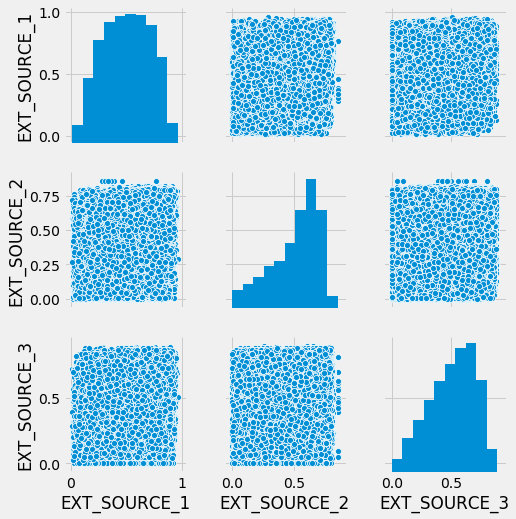

In [60]:
sns.pairplot(X)

In [61]:
label_X = X.select_dtypes(include=['object'])
int_X = X.select_dtypes(exclude=['object'])

In [62]:
label_X.head()

,CODE_GENDER,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Working,Single / not married,House / apartment,Laborers
1,F,State servant,Married,House / apartment,Core staff
2,M,Working,Single / not married,House / apartment,Laborers
3,F,Working,Civil marriage,House / apartment,Laborers
4,M,Working,Single / not married,House / apartment,Core staff


In [63]:
cols = label_X.columns.tolist()
label_X = pd.get_dummies(label_X, columns=cols)

In [64]:
X = pd.concat([label_X, int_X], axis=1)

In [66]:
X.isnull().sum()

CODE_GENDER_F                                   0
CODE_GENDER_M                                   0
CODE_GENDER_XNA                                 0
NAME_INCOME_TYPE_Businessman                    0
NAME_INCOME_TYPE_Commercial associate           0
NAME_INCOME_TYPE_Maternity leave                0
NAME_INCOME_TYPE_Pensioner                      0
NAME_INCOME_TYPE_State servant                  0
NAME_INCOME_TYPE_Student                        0
NAME_INCOME_TYPE_Unemployed                     0
NAME_INCOME_TYPE_Working                        0
NAME_FAMILY_STATUS_Civil marriage               0
NAME_FAMILY_STATUS_Married                      0
NAME_FAMILY_STATUS_Separated                    0
NAME_FAMILY_STATUS_Single / not married         0
NAME_FAMILY_STATUS_Unknown                      0
NAME_FAMILY_STATUS_Widow                        0
NAME_HOUSING_TYPE_Co-op apartment               0
NAME_HOUSING_TYPE_House / apartment             0
NAME_HOUSING_TYPE_Municipal apartment           0


Since there are missing values, and I cannot use k-means when the data have a missing value. I imputed the missing values by the mean of the non-missing value

In [70]:
from sklearn.impute import SimpleImputer
# use for loop for SimpleImputer
cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for col in cols:
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(X[[col]])

    imp_mean.transform(X[[col]])
    X[col] = imp_mean.transform(X[[col]]).flatten()
    print(col)

EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3


/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


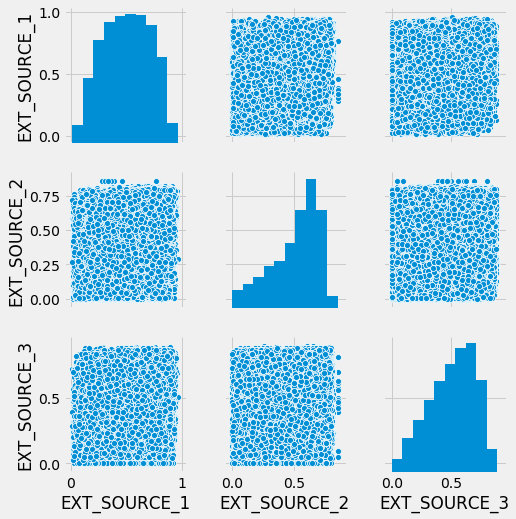

In [71]:
sns.pairplot(int_X)

Since the 3 numerical values does not pose a normal and standardize distribution, which is an assumption for k-means clustering. I will use normalization and standardization methods

In [72]:
from sklearn.preprocessing import Normalizer
int_X = transformer = Normalizer().fit_transform(X[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

X = pd.concat([label_X, pd.DataFrame(scaled_data, columns=cols)], axis=1)

In [73]:
int_X = pd.DataFrame(int_X, columns=cols)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

In [75]:
X = pd.concat([label_X, pd.DataFrame(scaled_data, columns=cols)], axis=1)

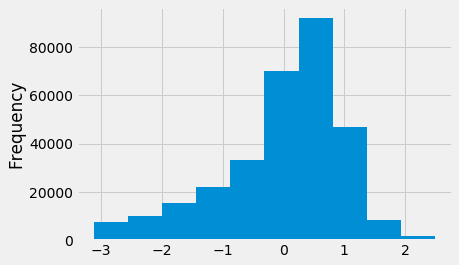

In [76]:
X['EXT_SOURCE_2'].plot(kind='hist')

The distribution below is now the transformed (normalized and standardized) form, which is more appropriate. Now we can proceed using K-Means

In [76]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [79]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean = KMeans(i)
    kmean.fit(scaled_data)
    cost.append(kmean.inertia_) 

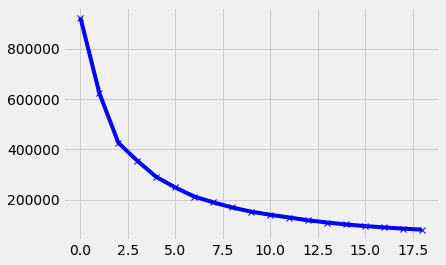

In [80]:
plt.plot(cost, 'bx-')

We can try 2 or 4 clusters based on the elbow criterion illustration above

In [82]:
kmeans = KMeans(4, random_state=22)
kmeans.fit(scaled_data)
labels = kmeans.labels_
df2 = X.copy()
df2['cluster'] = labels

/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


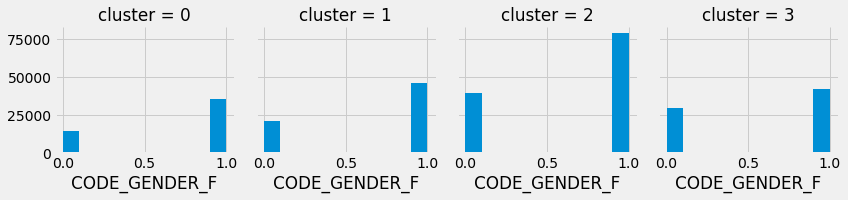

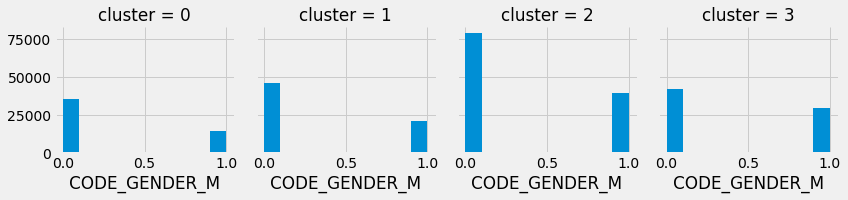

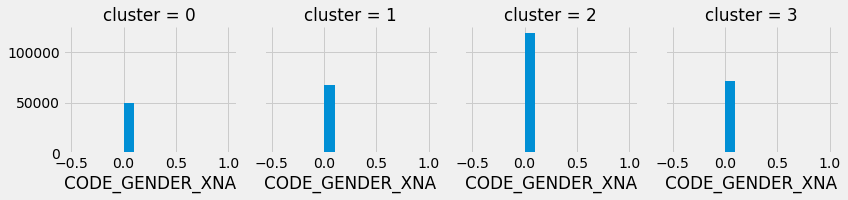

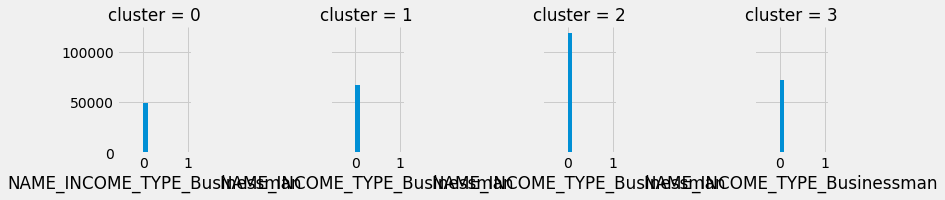

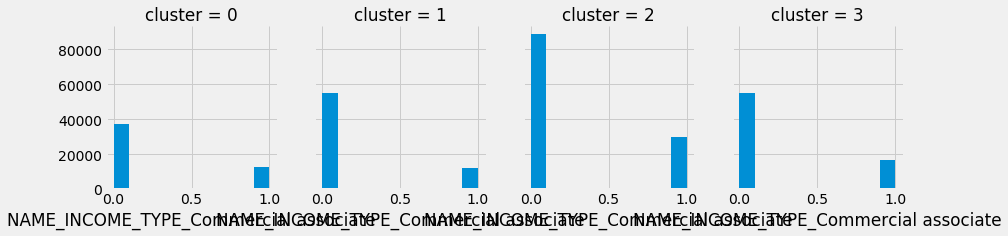

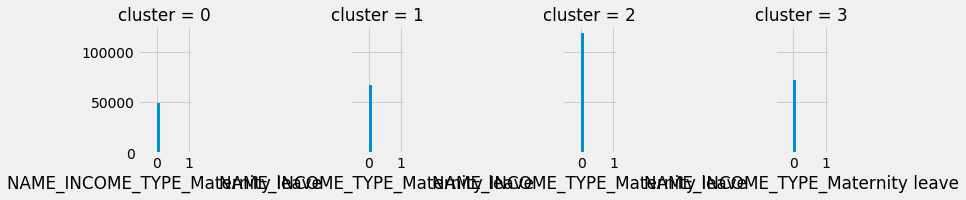

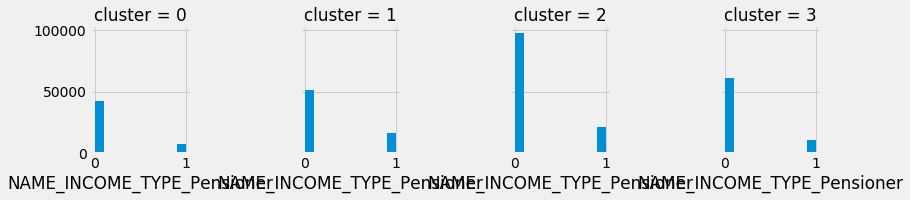

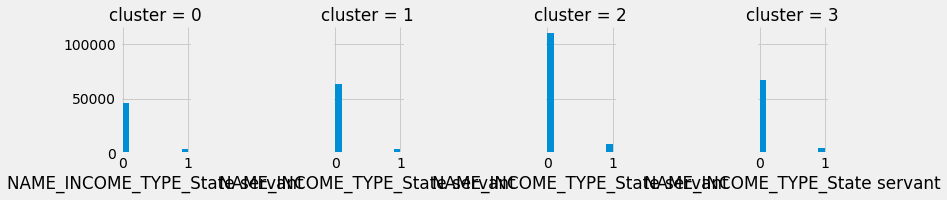

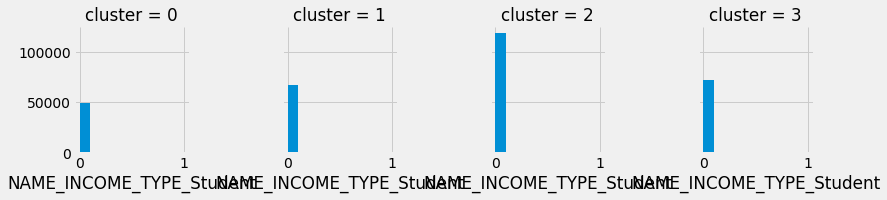

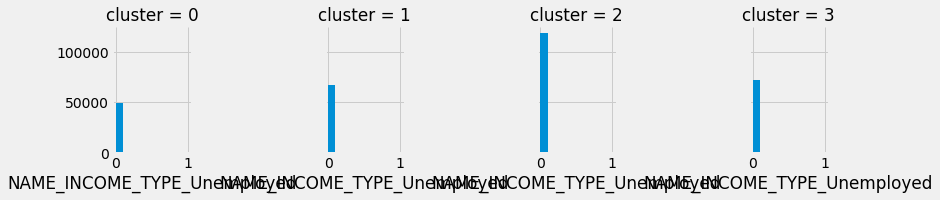

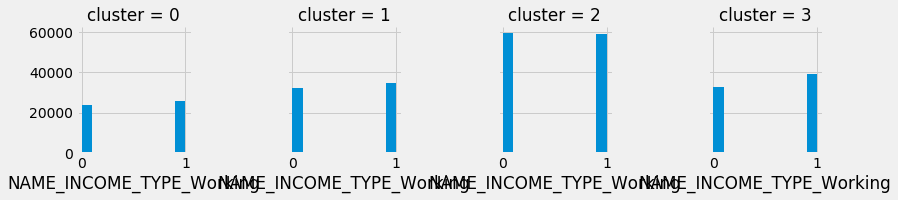

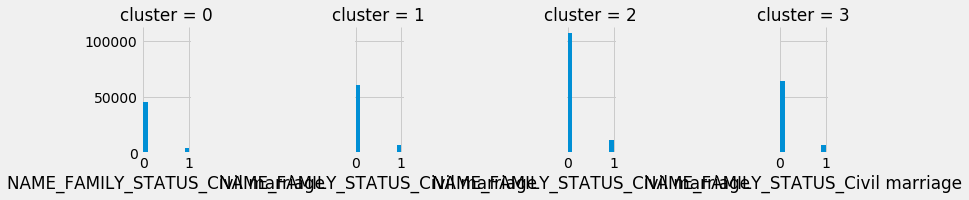

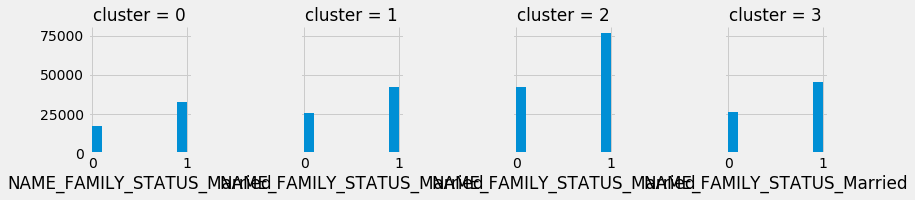

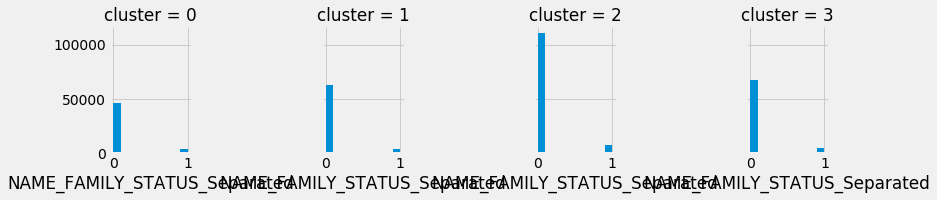

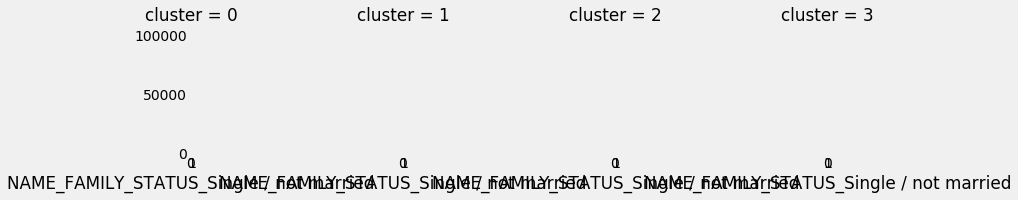

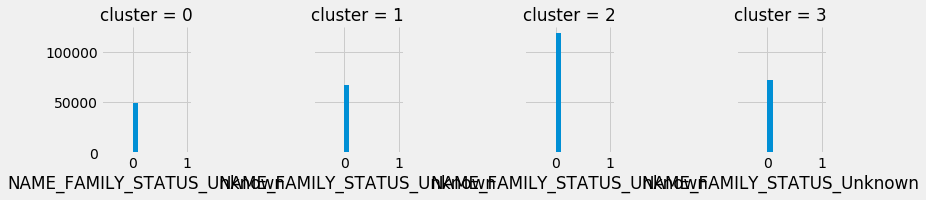

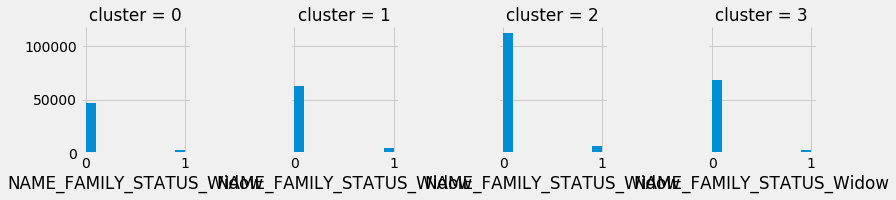

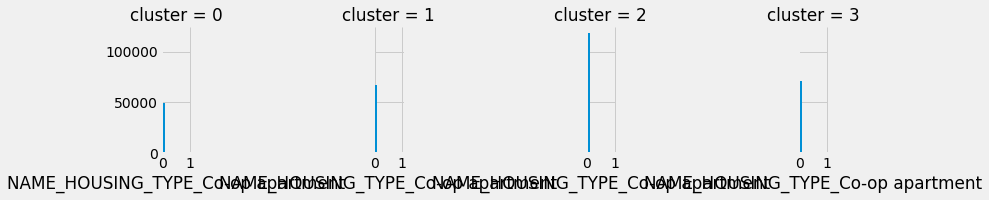

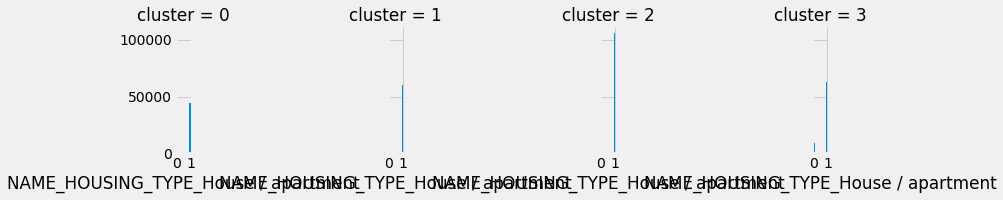

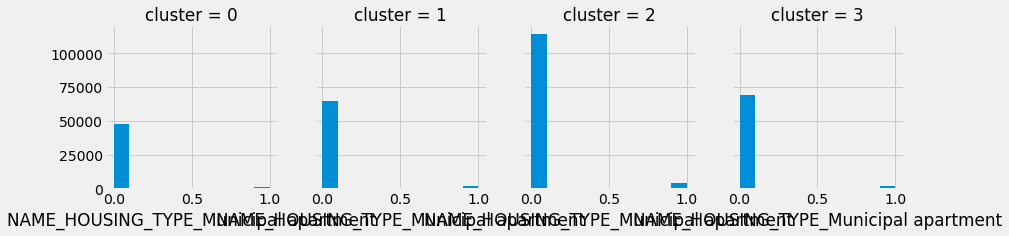

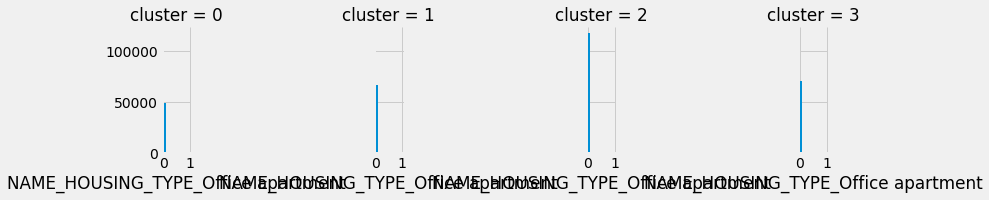

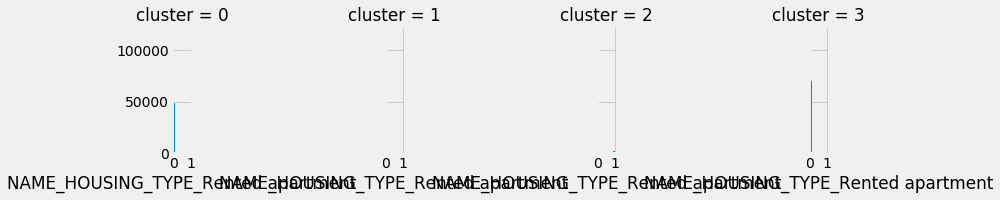

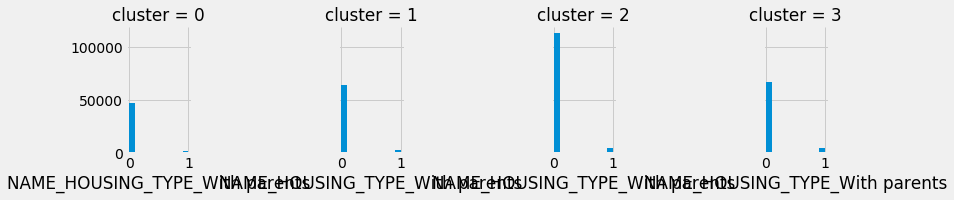

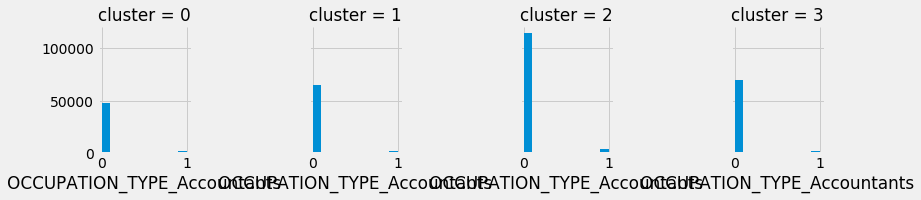

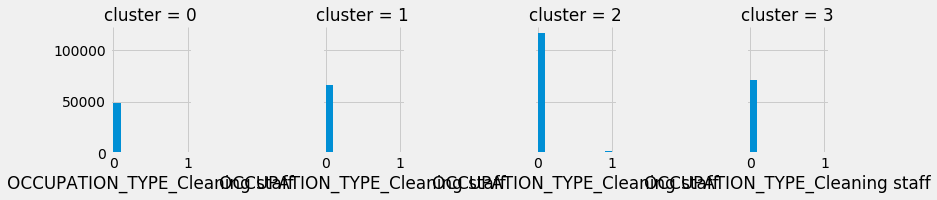

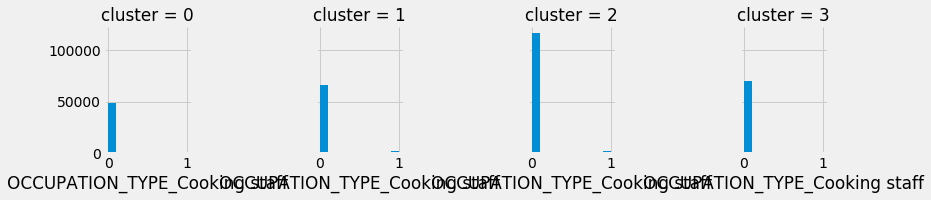

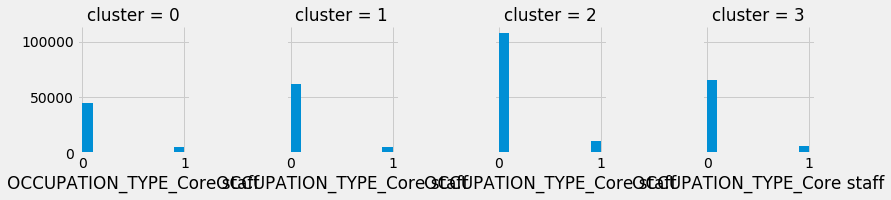

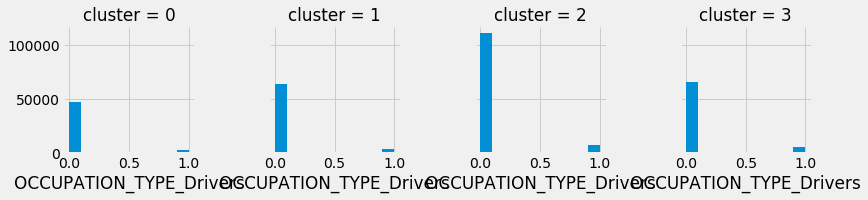

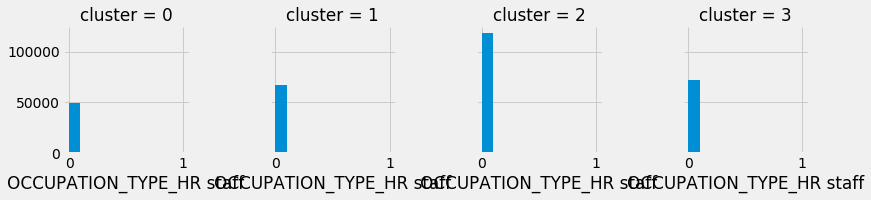

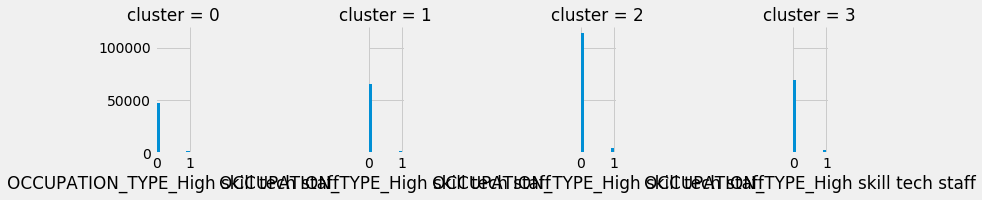

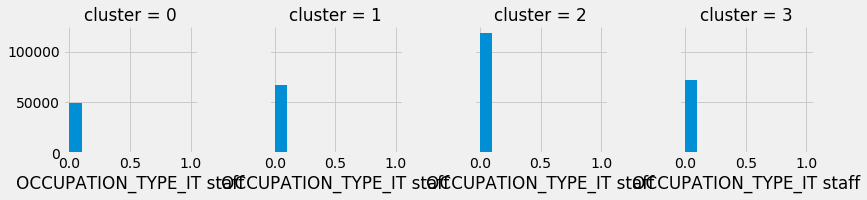

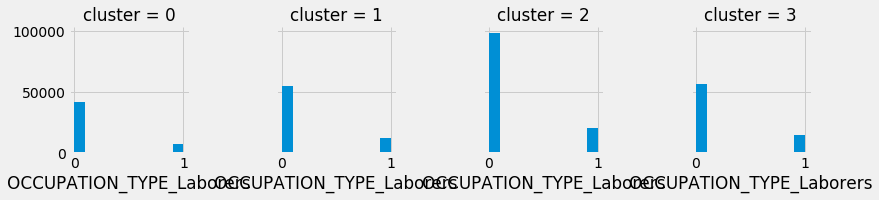

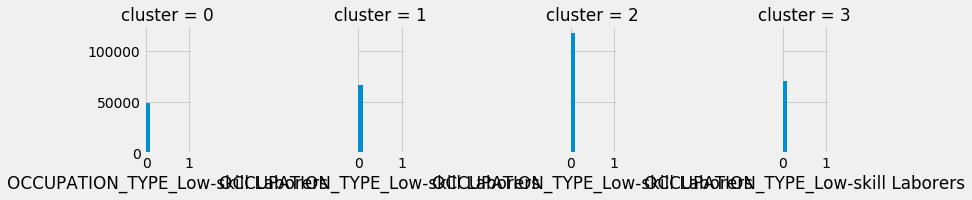

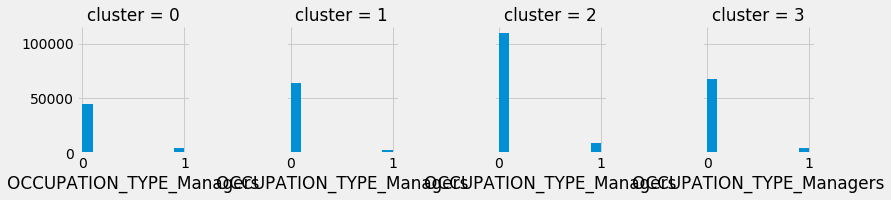

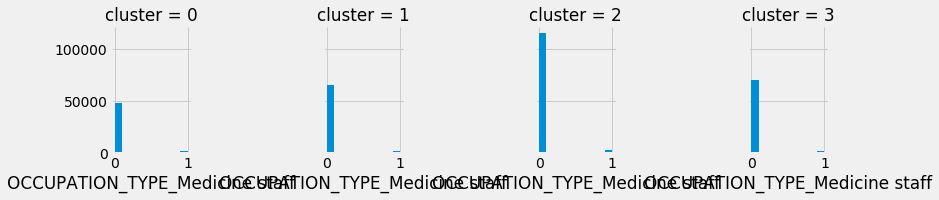

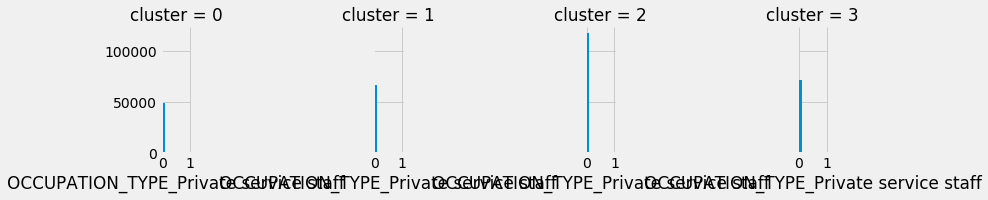

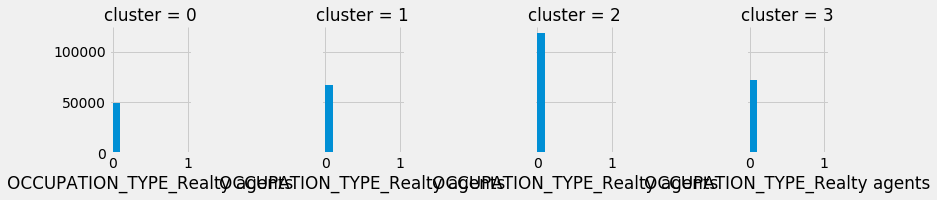

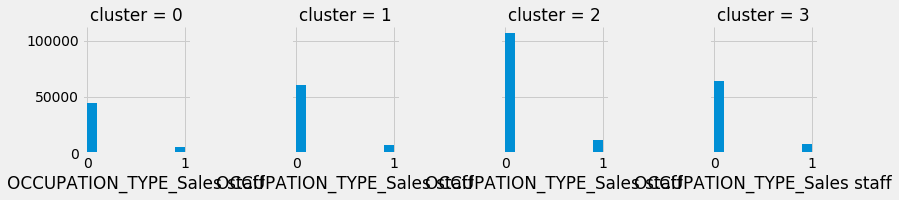

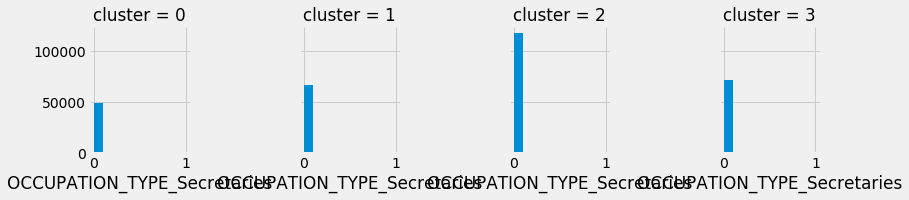

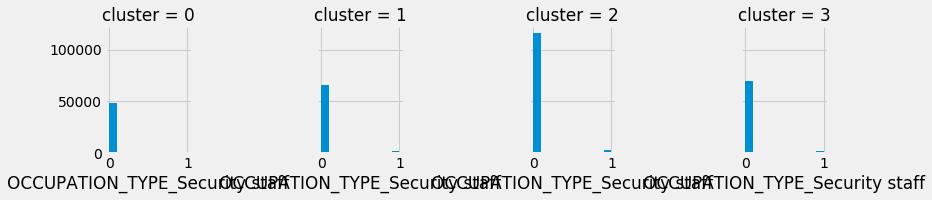

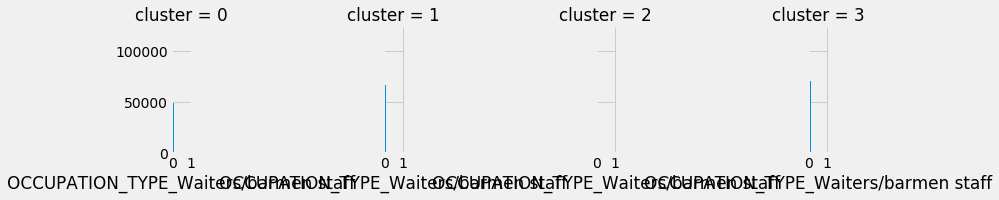

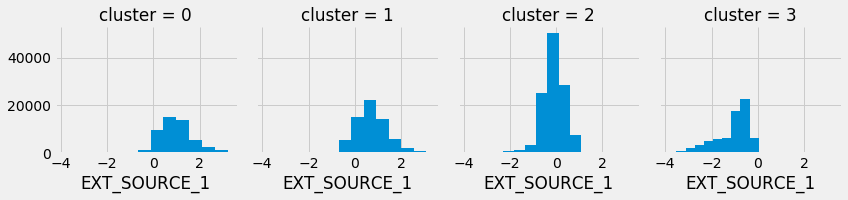

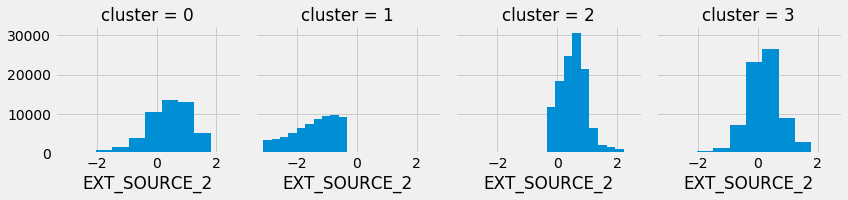

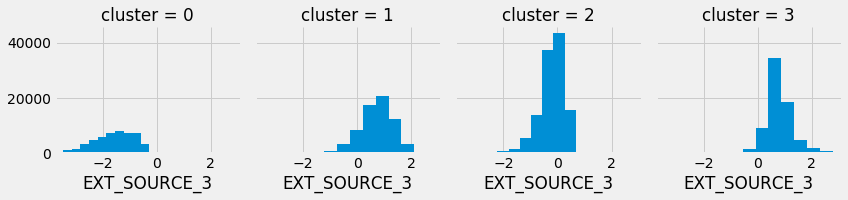

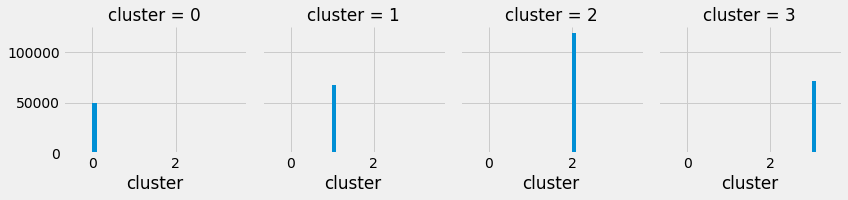

In [83]:
for c in df2:
    grid= sns.FacetGrid(df2, col='cluster')
    grid.map(plt.hist, c)

/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:4

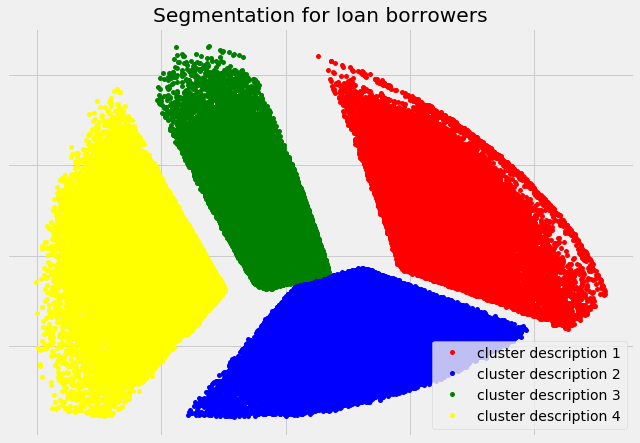

In [84]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df2)
X_PCA = pca.transform(df2)
X_PCA.shape

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',}

names = {0: 'Average Borrower', 
         1: 'High Loaner', 
         2: 'Loyal but Low-Spender', 
         3: 'Loyal but Low-Spender', 
         4: 'cluster description 5',
         5: 'cluster description 6'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 7)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(loc='lower right')
ax.set_title("Segmentation for loan borrowers")
plt.savefig('payment_kmeans_cluster')

In summary, I emerged with 4 clusters. But I turned the 2 clusters into 1 because they had the same characteristics except for the gender. I hope I can investigate more on their subtle differences. For now I arrived with 3 customer segments: Average Borrowers, High Loaners, and Loyal, Low-Spenders

## Unsupervised Learning using Python
In this additional section of my code, I tried to expand my dimension reductionality process. Then I tried other clustering algorthms and evaluated the clusters by creating a function that checks the number of similar groups of customers (demographics, ability to pay and assets/collateral) by their payment patterns (recency, frequency and monetary value of their loan)

### Dimension Reductionality

In [171]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [257]:
len(X_train.columns.tolist())

22

Let's do the Principal Component Analysis to cut the number of variables, since I did a lot of transformation into dummy variables

In [258]:
from sklearn.decomposition import PCA

n_components = 22
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

In [259]:
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

In [260]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999998


In [261]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 30 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:29].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:39].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:100].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.99999998]
Variance Captured by First 20 Principal Components:  [1.]
Variance Captured by First 30 Principal Components:  [1.]
Variance Captured by First 100 Principal Components:  [1.]
Variance Captured by First 200 Principal Components:  [1.]


### K-means clustering

In [262]:
cols = X_train.columns.tolist()
from sklearn.preprocessing import Normalizer
int_X = transformer = Normalizer().fit_transform(X_train[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

X_train = pd.DataFrame(scaled_data, columns=cols)

In [263]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 4
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 9
kmeans.fit(X_train_PCA.loc[:,0:cutoff])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=2, precompute_distances='auto',
       random_state=2018, tol=0.0001, verbose=0)

In [265]:
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = \
        pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
        
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
        
    countMostFreq = \
        pd.DataFrame(data=preds.groupby('cluster').agg( \
                        lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, \
                        left_on="cluster",right_on="cluster")
    overallAccuracy = accuracyDF.countMostFrequent.sum()/ \
                        accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/ \
                        accuracyDF.clusterCount
    
    return countByCluster, countByLabel, countMostFreq, \
            accuracyDF, overallAccuracy, accuracyByLabel

### Getting the label of the RFM segmentation
As mentioned before, this will be used to evaluate the clusters of each algorithms if they have a homegenous label for their payment patterns

In [266]:
X_train.columns

Index(['MONTHS_BALANCE_POS_min', 'CNT_INSTALMENT_POS_max',
       'CNT_INSTALMENT_FUTURE_POS_max', 'CNT_INSTALMENT_FUTURE_POS_count',
       'NAME_CONTRACT_STATUS_POS_max', 'POS_PAYMENT_TYPE',
       'DAYS_INSTALMENT_INST_max', 'DAYS_ENTRY_PAYMENT_INST_max',
       'AMT_INSTALMENT_INST_max', 'AMT_PAYMENT_INST_max',
       'AMT_PAYMENT_INST_count', 'INST_PAYMENT_TYPE', 'AMT_BALANCE_CC_max',
       'AMT_CREDIT_LIMIT_ACTUAL_CC_mean', 'AMT_DRAWINGS_CURRENT_CC_mean',
       'AMT_DRAWINGS_CURRENT_CC_count', 'AMT_DRAWINGS_OTHER_CURRENT_CC_count',
       'AMT_INST_MIN_REGULARITY_CC_max', 'AMT_PAYMENT_TOTAL_CURRENT_CC_mean',
       'AMT_TOTAL_RECEIVABLE_CC_mean', 'CNT_DRAWINGS_CURRENT_CC_mean',
       'CC_PAYMENT_TYPE'],
      dtype='object')

In [267]:
freq_cols = ['CNT_INSTALMENT_POS_max', 'CNT_INSTALMENT_FUTURE_POS_max', 'CNT_INSTALMENT_FUTURE_POS_count', 'CNT_DRAWINGS_CURRENT_CC_mean', 'AMT_PAYMENT_INST_count', 'AMT_DRAWINGS_CURRENT_CC_count', 'AMT_DRAWINGS_OTHER_CURRENT_CC_count']
rec_cols = ['MONTHS_BALANCE_POS_min', 'DAYS_INSTALMENT_INST_max', 'DAYS_ENTRY_PAYMENT_INST_max']
mon_cols = ['AMT_INSTALMENT_INST_max', 'AMT_PAYMENT_INST_max', 'AMT_BALANCE_CC_max', 'AMT_CREDIT_LIMIT_ACTUAL_CC_mean', 'AMT_DRAWINGS_CURRENT_CC_mean', 'AMT_INST_MIN_REGULARITY_CC_max', 'AMT_PAYMENT_TOTAL_CURRENT_CC_mean', 'AMT_TOTAL_RECEIVABLE_CC_mean']

Use KBinsDiscretizer to segment the tiers of Recency, Frequency and Monetary features

In [268]:
from sklearn.preprocessing import KBinsDiscretizer

In [269]:
cols = freq_cols + rec_cols + mon_cols

est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
est.fit(X_train[cols])

X_train[cols] = est.transform(X_train[cols])

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 14 are removed. Consider decreasing the number 

In [270]:
freq_cols = ['CNT_INSTALMENT_POS_max', 'CNT_INSTALMENT_FUTURE_POS_max', 'CNT_INSTALMENT_FUTURE_POS_count', 'CNT_DRAWINGS_CURRENT_CC_mean', 'AMT_PAYMENT_INST_count', 'AMT_DRAWINGS_CURRENT_CC_count', 'AMT_DRAWINGS_OTHER_CURRENT_CC_count']
rec_cols = ['MONTHS_BALANCE_POS_min', 'DAYS_INSTALMENT_INST_max', 'DAYS_ENTRY_PAYMENT_INST_max']
mon_cols = ['AMT_INSTALMENT_INST_max', 'AMT_PAYMENT_INST_max', 'AMT_BALANCE_CC_max', 'AMT_CREDIT_LIMIT_ACTUAL_CC_mean', 'AMT_DRAWINGS_CURRENT_CC_mean', 'AMT_INST_MIN_REGULARITY_CC_max', 'AMT_PAYMENT_TOTAL_CURRENT_CC_mean', 'AMT_TOTAL_RECEIVABLE_CC_mean']

In [271]:
X_train['frequency_score'] = X_train['CNT_INSTALMENT_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_count'] + X_train['CNT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_PAYMENT_INST_count'] + X_train['AMT_DRAWINGS_CURRENT_CC_count'] + X_train['AMT_DRAWINGS_OTHER_CURRENT_CC_count']
X_train['recency_score'] = X_train['MONTHS_BALANCE_POS_min'] + X_train['DAYS_INSTALMENT_INST_max'] + X_train['DAYS_ENTRY_PAYMENT_INST_max']
X_train['monetary_score'] = X_train['AMT_INSTALMENT_INST_max'] + X_train['AMT_PAYMENT_INST_max'] + X_train['AMT_BALANCE_CC_max'] + X_train['AMT_CREDIT_LIMIT_ACTUAL_CC_mean'] + X_train['AMT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_INST_MIN_REGULARITY_CC_max'] + X_train['AMT_PAYMENT_TOTAL_CURRENT_CC_mean'] + X_train['AMT_TOTAL_RECEIVABLE_CC_mean']

In [272]:
freq_score = X_train['CNT_INSTALMENT_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_count'] + X_train['CNT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_PAYMENT_INST_count'] + X_train['AMT_DRAWINGS_CURRENT_CC_count'] + X_train['AMT_DRAWINGS_OTHER_CURRENT_CC_count']
rec_score = X_train['MONTHS_BALANCE_POS_min'] + X_train['DAYS_INSTALMENT_INST_max'] + X_train['DAYS_ENTRY_PAYMENT_INST_max']
mon_score = X_train['AMT_INSTALMENT_INST_max'] + X_train['AMT_PAYMENT_INST_max'] + X_train['AMT_BALANCE_CC_max'] + X_train['AMT_CREDIT_LIMIT_ACTUAL_CC_mean'] + X_train['AMT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_INST_MIN_REGULARITY_CC_max'] + X_train['AMT_PAYMENT_TOTAL_CURRENT_CC_mean'] + X_train['AMT_TOTAL_RECEIVABLE_CC_mean']

In [213]:
cols = ['frequency_score', 'recency_score', 'monetary_score']

est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
est.fit(X_train[cols])

X_train[cols] = est.transform(X_train[cols])

In [214]:
X_train[cols] = X_train[cols].astype('int')

In [273]:
X_train['label'] = X_train['frequency_score'] + X_train['recency_score'] + X_train['monetary_score']

In [274]:
rfm_cols = ['frequency_score', 'recency_score', 'monetary_score', 'label']
X_train[rfm_cols].min()

frequency_score    0.0
recency_score      0.0
monetary_score     3.0
label              5.0
dtype: float64

In [275]:
y_train = X_train['label']
X_train = X_train.drop(columns=['label'])

In [276]:
cols = X_train.columns.tolist()
from sklearn.preprocessing import Normalizer
int_X = Normalizer().fit_transform(X_train[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

X_train = pd.DataFrame(scaled_data, columns=cols)

In [277]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2


kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 9
kmeans.fit(X_train_PCA.loc[:,0:cutoff])
#kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    
# Plot of kmeans inertia for every clusters
#kMeans_inertia.plot()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=2, precompute_distances='auto',
       random_state=2018, tol=0.0001, verbose=0)

In [278]:
# K-means - Accuracy as the number of clusters varies

n_clusters = 4
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = \
    pd.DataFrame(data=[],index=range(2,21),columns=['inertia'])
overallAccuracy_kMeansDF = \
    pd.DataFrame(data=[],index=range(2,21),columns=['overallAccuracy'])

#for n_clusters in range(2,21):
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 99
kmeans.fit(X_train_PCA.loc[:,0:cutoff])
kMeans_inertia.loc[n_clusters] = kmeans.inertia_
X_train_kmeansClustered = kmeans.predict(X_train_PCA.loc[:,0:cutoff])
X_train_kmeansClustered = \
    pd.DataFrame(data=X_train_kmeansClustered, index=X_train.index, \
                     columns=['cluster'])
    
countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
    accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans \
    = analyzeCluster(X_train_kmeansClustered, y_train)
    
overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

In [222]:
accuracyByLabel_kMeans

0    0.212716
1    0.329685
2    0.705951
3    0.264378
dtype: float64

Low accuracy because labels are not yet super defined

### Hierarchical Clustering

In [223]:
!pip install fastcluster
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist

cutoff = 9
Z = fastcluster.linkage_vector(X_train_PCA.loc[:,0:cutoff], \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])

KeyboardInterrupt: 

In [91]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 50000000
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = \
    pd.DataFrame(data=clusters,index=X_train_PCA.index,columns=['cluster'])

In [92]:
print("Number of distinct clusters: ", \
      len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  4


In [93]:
countByCluster_hierClust, countByLabel_hierClust, \
    countMostFreq_hierClust, accuracyDF_hierClust, \
    overallAccuracy_hierClust, accuracyByLabel_hierClust \
    = analyzeCluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", \
      overallAccuracy_hierClust)


Overall accuracy from hierarchical clustering:  0.17017488914896073


In [94]:
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

Accuracy by cluster for hierarchical clustering


0    0.172543
1    0.166775
2    0.170493
3    0.170606
dtype: float64

### HDBScan

In [95]:
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)

cutoff = 9
X_train_PCA_dbscanClustered = db.fit_predict(X_train_PCA.loc[:,0:cutoff])
X_train_PCA_dbscanClustered = \
    pd.DataFrame(data=X_train_PCA_dbscanClustered, index=X_train.index, \
                 columns=['cluster'])

countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    = analyzeCluster(X_train_PCA_dbscanClustered, y_train)

overallAccuracy_dbscan

0.21247960176042988

In [96]:
print("Overall accuracy from DBSCAN: ",overallAccuracy_dbscan)

Overall accuracy from DBSCAN:  0.21247960176042988


### Discovering the demographics for the RFM label

/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


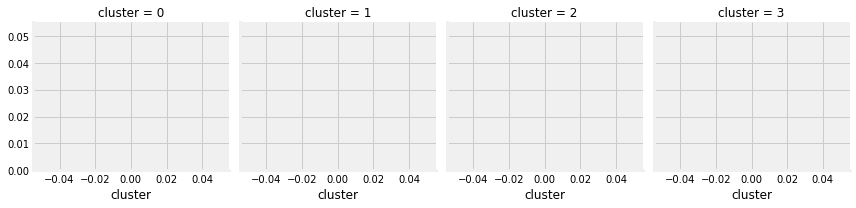

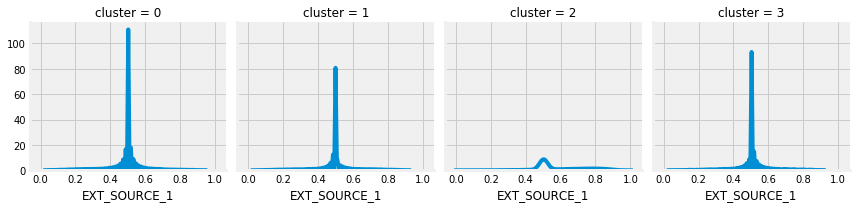

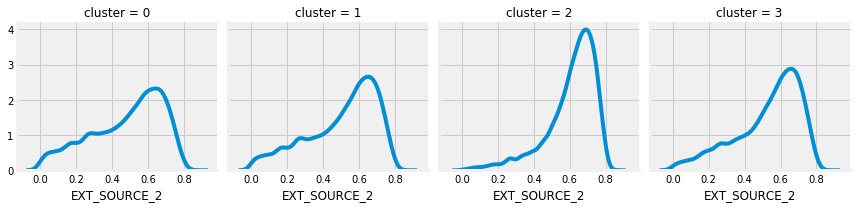

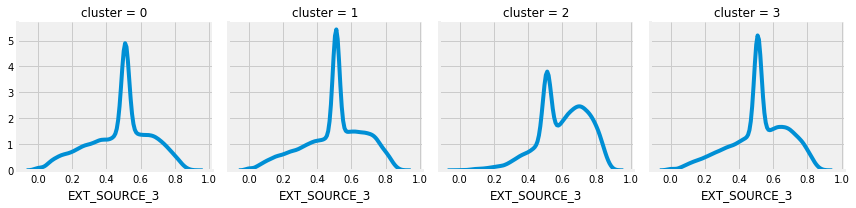

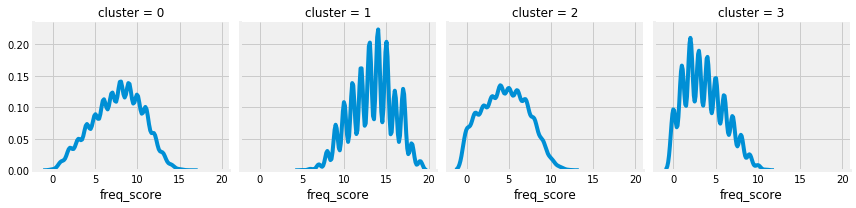

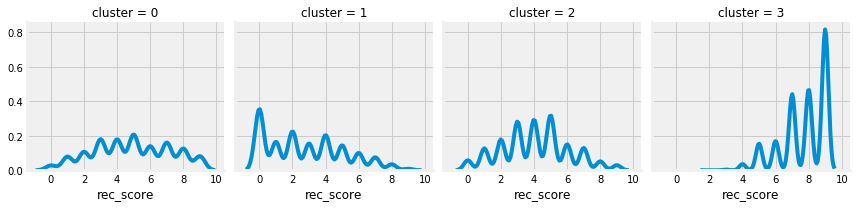

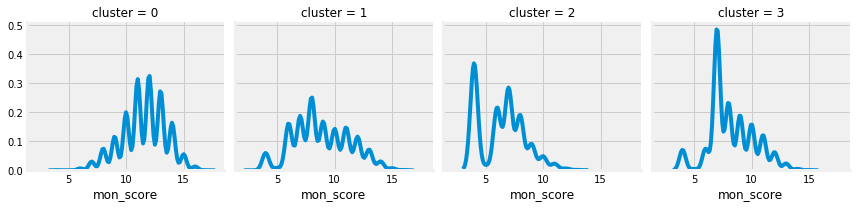

In [312]:
import seaborn as sns

for c in df2:
    grid= sns.FacetGrid(df2, col='cluster')
    grid.map(sns.kdeplot, c)

In [313]:
df.groupby('cluster')[['freq_score', 'rec_score', 'mon_score']].median()

,freq_score,rec_score,mon_score
cluster,,,
0,8.0,5.0,12.0
1,14.0,2.0,9.0
2,5.0,4.0,7.0
3,3.0,8.0,8.0


### Results
Using the second approach of evaluating the clusters of borrowers by the homegenity of their payment pattern label garners K-Means and DBScan as the best clustering algorithm. <br>
<b>K-Means</b> and <b>DBScan</b> had an average of <i>21%</i> homogenity while hierarchical clustering had an average of <i>17%</i>. This means that we used the right algorithm to use in our first clustering, but still had a lot of room for improvement especially by homogeneity of their payment pattern labels.

## SUMMARY
1. Payment Patterns (previously) can predict if a borrower will be approved or not in his/her loan application. <b>Accuracy</b>: <i>91%</i>
2. There are 3 clusters I discovered by using K-Means to the payments patters, demographics, ability to pay and assets/collateral: (1) <b>Average Borrower</b>, (2) <b>High Loaner</b> and (3) <b>Loyal, Low-Spender Borrower</b>
3. K-Means and DBScan clustering is best used for this dataset (21%), versus Hierarchical clustering (17%). However, we can still improvee it by adding more data about the borrowers demographics, loan requirements, and other alternative data